In [1]:
import numpy as np
from typing import List
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional, Dense

In [2]:
def embed_word(word: str, embedding_size: int) -> np.ndarray:
    return np.random.random(size=embedding_size)

def embed_sentence(sentence: str, embedding_size: int) -> np.ndarray:
    word_embeddings = [embed_word(word, embedding_size) for word in sentence.split()]
    return np.vstack(word_embeddings)

def embed_sentence_batch(sentence_batch: List[str], embedding_size: int) -> np.ndarray:
    target_length = max([len(sentence.split()) for sentence in sentence_batch])
    sentence_embeddings = []
    for sentence in sentence_batch:
        sentence_length = len(sentence.split())
        sentence_embedding = embed_sentence(sentence, embedding_size)
        if sentence_length < target_length:
            padding = np.zeros((target_length - sentence_length, embedding_size))
            sentence_embedding = np.vstack([padding, sentence_embedding])
        sentence_embeddings.append(np.expand_dims(sentence_embedding, axis=0))
    return np.vstack(sentence_embeddings)

In [3]:
word = 'froid'
embedded_word = embed_word(word, 300)

print(embedded_word)
print('\nSize:', embedded_word.shape)

[0.16886725 0.27901582 0.7994516  0.48364823 0.5245525  0.17322997
 0.95251919 0.32288223 0.55228669 0.53203085 0.81085446 0.76989247
 0.0254106  0.96820723 0.38255378 0.37200188 0.87761929 0.38166178
 0.33062025 0.39149987 0.07583731 0.23971845 0.57250703 0.14009298
 0.16460874 0.35027727 0.13192516 0.8072954  0.21816707 0.16467004
 0.76865515 0.20388424 0.57201089 0.53417925 0.15252803 0.85599874
 0.39998188 0.20511761 0.53374958 0.72237667 0.02704961 0.7932269
 0.66355945 0.13472714 0.57730823 0.96513614 0.1331363  0.73302543
 0.67003259 0.72399243 0.39997957 0.84480115 0.21352931 0.50498558
 0.38129935 0.17643899 0.87697692 0.35150726 0.43785941 0.92311593
 0.56847846 0.00721755 0.21248431 0.43635973 0.56073281 0.70077781
 0.8159813  0.86562646 0.92171114 0.3576563  0.77740467 0.39834867
 0.15976159 0.25715925 0.1792287  0.82120689 0.748481   0.0809502
 0.54935928 0.97286139 0.12383218 0.28367822 0.53713931 0.75581531
 0.64637886 0.47337144 0.49864668 0.7463868  0.42284985 0.355937

In [4]:
sentence = 'Il fait froid en ce moment'
embedded_sentence = embed_sentence(sentence, 300)

print(embedded_sentence)
print('\nSize:', embedded_sentence.shape)

[[0.94278225 0.57790061 0.04835633 ... 0.79388364 0.22044097 0.60148299]
 [0.77717299 0.81729673 0.17488935 ... 0.63053998 0.06636864 0.54338005]
 [0.50479796 0.88934038 0.39613474 ... 0.63749204 0.36576312 0.44996108]
 [0.50508531 0.60399695 0.83960149 ... 0.39027923 0.3743601  0.80650984]
 [0.69189627 0.16982174 0.46425652 ... 0.68568678 0.74870413 0.87628483]
 [0.0528351  0.23368208 0.5695848  ... 0.55404618 0.14011846 0.01544156]]

Size: (6, 300)


In [5]:
sentence = 'Bientôt les vacances'
embedded_sentence = embed_sentence(sentence, 300)

print(embedded_sentence)
print('\nSize:', embedded_sentence.shape)

[[9.41212654e-01 6.12958912e-01 8.68862299e-01 9.40870848e-01
  1.98934832e-01 4.31008354e-01 6.02791970e-01 1.74485104e-01
  5.07305217e-01 2.68928106e-01 6.47246279e-01 9.89693233e-01
  4.45017318e-01 8.81309099e-01 4.76941663e-02 8.14059957e-01
  4.93367725e-01 3.44364722e-01 4.00674934e-01 3.16334095e-01
  8.88492647e-01 2.71136191e-01 9.88574294e-01 7.34640559e-01
  1.85465989e-01 8.70080401e-01 7.93616997e-01 3.79964628e-01
  6.14051533e-01 3.82315466e-02 5.62595754e-01 2.76926086e-01
  6.85069931e-01 1.74919661e-01 3.82129002e-01 9.82786877e-01
  8.24616230e-01 7.59532795e-01 7.51664760e-01 6.21284058e-01
  6.19271240e-01 2.88263340e-01 7.52149828e-01 5.34836047e-02
  9.11745784e-01 3.71402275e-01 7.38117232e-01 2.00365166e-01
  5.04788566e-01 8.04789199e-01 1.06192655e-01 8.57302345e-01
  1.50683227e-01 7.38782822e-01 6.23819452e-01 5.47995163e-02
  2.71320105e-01 8.86856576e-01 7.95640501e-01 2.64123946e-02
  6.91282082e-01 1.02320675e-01 5.00374736e-01 6.01846421e-01
  5.2878

In [6]:
sentence_batch = [
    'Il fait froid en ce moment',
    "Bientôt les vacances"
]
embedded_sentence_batch = embed_sentence_batch(sentence_batch, 300)

print(embedded_sentence_batch)
print('\nSize:', embedded_sentence_batch.shape)

[[[0.69723973 0.43877679 0.90632639 ... 0.5969915  0.77381628 0.38732161]
  [0.48055171 0.31788967 0.46105124 ... 0.50380665 0.15659135 0.41379025]
  [0.24393613 0.67689211 0.6008345  ... 0.56630318 0.31271457 0.92601761]
  [0.37418869 0.70383151 0.86813461 ... 0.26841157 0.50339638 0.85466999]
  [0.3480998  0.01894668 0.6074714  ... 0.42107239 0.90260025 0.56449039]
  [0.52258919 0.10414002 0.66436093 ... 0.27890696 0.1236953  0.86579826]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.15547515 0.06491747 0.76108272 ... 0.40704662 0.28860729 0.08624884]
  [0.49745028 0.85714448 0.65820459 ... 0.7055047  0.33253406 0.82386782]
  [0.18959546 0.42615491 0.76491832 ... 0.00336915 0.28739743 0.09386006]]]

Size: (2, 6, 300)


# RNN

In [38]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=16, input_shape=(6, 300), use_bias=False))

In [39]:
model_rnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 16)                5056      
Total params: 5,056
Trainable params: 5,056
Non-trainable params: 0
_________________________________________________________________


In [40]:
rnn_weights = model_rnn.get_weights()
print(type(rnn_weights))
print(len(rnn_weights))

<class 'list'>
2


In [41]:
rnn_weights[0]

array([[-0.11488974,  0.01088971,  0.0305475 , ..., -0.08950311,
         0.1176997 , -0.10245049],
       [ 0.10472341, -0.13109815, -0.00283122, ...,  0.00069888,
         0.03421474,  0.11536644],
       [ 0.10625987,  0.02631821, -0.04996307, ...,  0.08613025,
        -0.01226197,  0.07121693],
       ...,
       [ 0.1377139 ,  0.06709787, -0.04169541, ...,  0.04393679,
         0.10430694,  0.11370869],
       [ 0.03948747, -0.09002281, -0.04369003, ...,  0.05002201,
        -0.04072043,  0.08864115],
       [-0.10669389,  0.06436284, -0.09436207, ...,  0.01893434,
        -0.114719  , -0.04776535]], dtype=float32)

In [42]:
rnn_weights[0].shape

(300, 16)

In [43]:
rnn_weights[1].shape

(16, 16)

In [44]:
300 * 16 + 16 * 16

5056

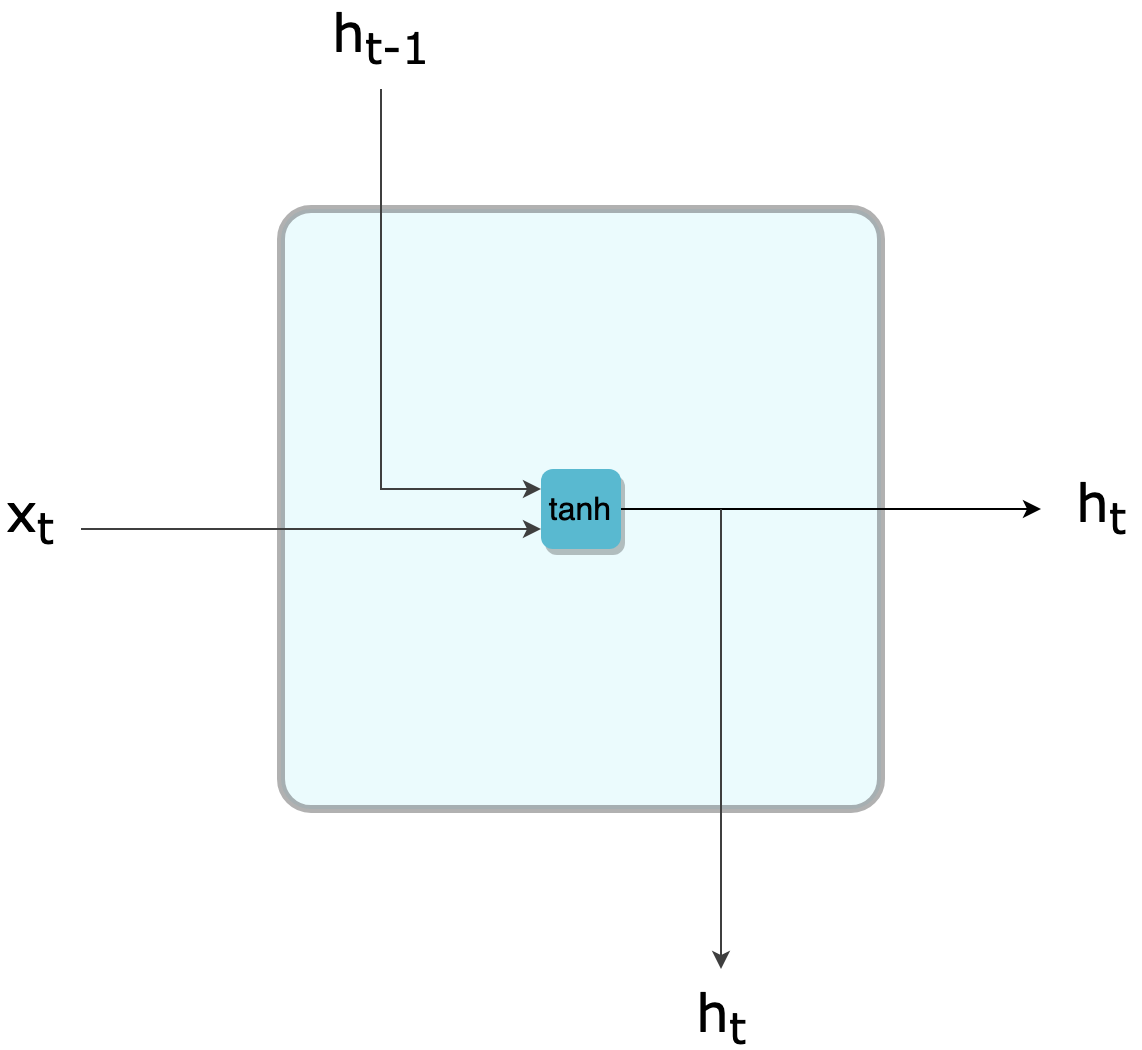

In [21]:
Image(filename='./0-CompleteRNN.png', width=500)

# LSTM

In [45]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=16, input_shape=(6, 300), use_bias=False))

In [46]:
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                20224     
Total params: 20,224
Trainable params: 20,224
Non-trainable params: 0
_________________________________________________________________


In [47]:
5056 * 4

20224

In [48]:
lstm_weights = model_lstm.get_weights()
print(type(lstm_weights))
print(len(lstm_weights))

<class 'list'>
2


In [49]:
lstm_weights[0].shape

(300, 64)

In [51]:
lstm_weights[1].shape

(16, 64)

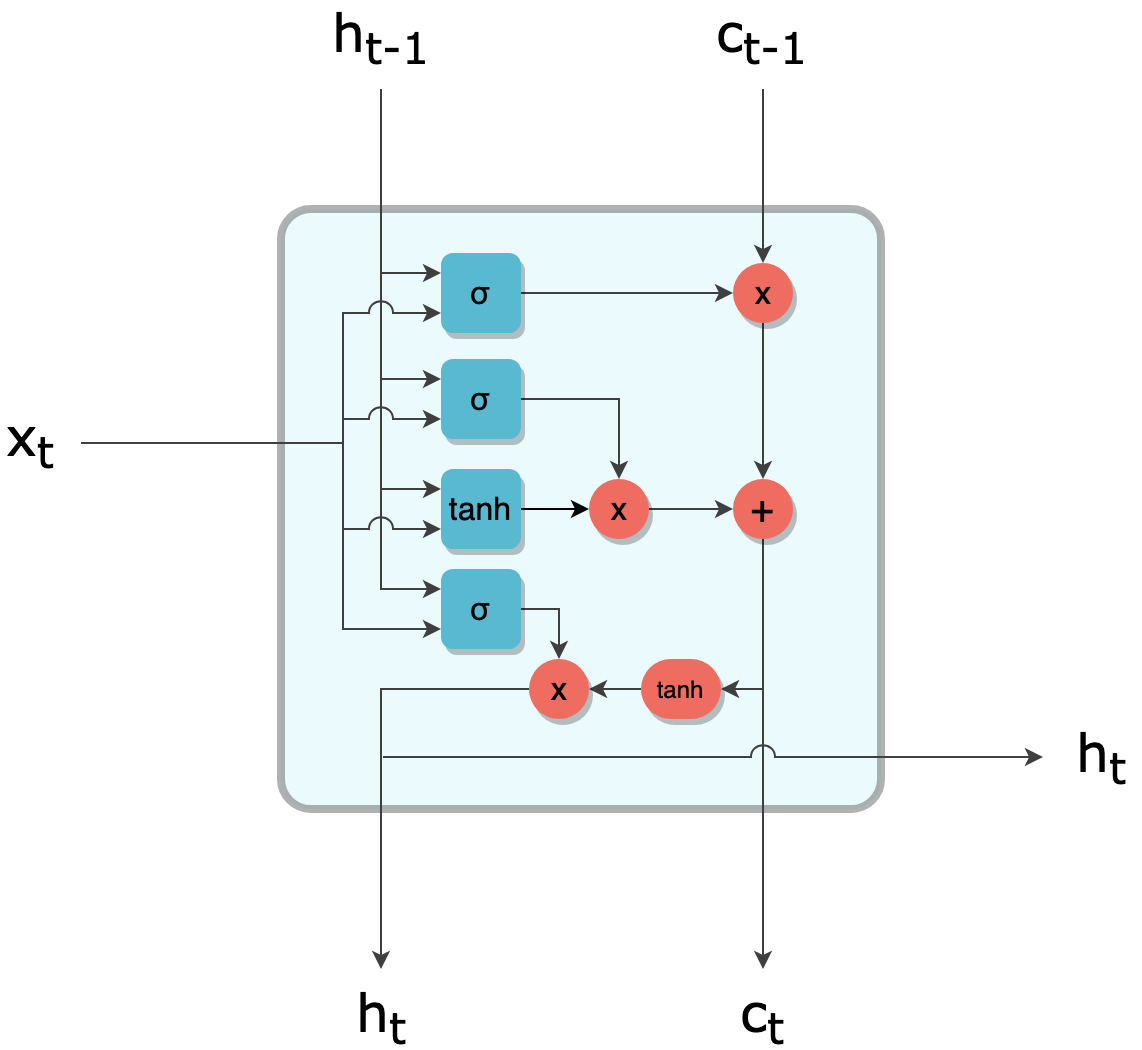

In [28]:
Image(filename='0-CompleteLSTM.png', width=500)